In [2]:
import pandas as pd

df = pd.read_csv('../Preprocessing/final_mental_data.csv')

In [3]:
df.head(5)

,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Work_Stress_Index,Physical_Activity_Stress_Index
0,0,2,6,1,0,2,1,2,2,1,2,1,2
1,0,0,0,5,1,1,0,1,2,2,0,1,2
2,1,2,6,6,1,0,0,1,0,2,0,1,2
3,0,1,5,0,0,1,0,2,0,1,1,1,2
4,2,0,3,1,1,1,0,2,1,2,2,2,2


In [4]:
df.describe()

,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Work_Stress_Index,Physical_Activity_Stress_Index
count,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.00000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000
mean,0.777185,1.440961,3.136091,2.961975,0.462308,1.100734,0.54970,1.018679,1.078052,0.984656,1.042695,1.151434,1.552368
std,0.802857,1.086857,2.026236,1.995795,0.498744,0.787837,0.49769,0.776609,0.841937,0.764118,0.804389,0.632152,0.742852
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,2.000000,3.000000,3.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
75%,1.000000,2.000000,5.000000,5.000000,1.000000,2.000000,1.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,3.000000,6.000000,6.000000,1.000000,2.000000,1.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [5]:
df.columns

Index(['Age', 'Gender', 'Occupation', 'Country', 'Mental_Health_Condition',
       'Severity', 'Consultation_History', 'Stress_Level', 'Sleep_Hours',
       'Work_Hours', 'Physical_Activity_Hours', 'Work_Stress_Index',
       'Physical_Activity_Stress_Index'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Age                             1499 non-null   int64
 1   Gender                          1499 non-null   int64
 2   Occupation                      1499 non-null   int64
 3   Country                         1499 non-null   int64
 4   Mental_Health_Condition         1499 non-null   int64
 5   Severity                        1499 non-null   int64
 6   Consultation_History            1499 non-null   int64
 7   Stress_Level                    1499 non-null   int64
 8   Sleep_Hours                     1499 non-null   int64
 9   Work_Hours                      1499 non-null   int64
 10  Physical_Activity_Hours         1499 non-null   int64
 11  Work_Stress_Index               1499 non-null   int64
 12  Physical_Activity_Stress_Index  1499 non-null   int64
dtypes: 

In [7]:
df.columns

Index(['Age', 'Gender', 'Occupation', 'Country', 'Mental_Health_Condition',
       'Severity', 'Consultation_History', 'Stress_Level', 'Sleep_Hours',
       'Work_Hours', 'Physical_Activity_Hours', 'Work_Stress_Index',
       'Physical_Activity_Stress_Index'],
      dtype='object')

In [8]:
X = df.drop(columns=['Mental_Health_Condition'])
y = df['Mental_Health_Condition']


In [9]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)
importances = clf.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)


Feature Importance:
                           Feature  Importance
3                          Country    0.151380
2                       Occupation    0.150281
1                           Gender    0.098297
7                      Sleep_Hours    0.082206
0                              Age    0.078079
4                         Severity    0.076398
9          Physical_Activity_Hours    0.072194
8                       Work_Hours    0.069167
6                     Stress_Level    0.064902
10               Work_Stress_Index    0.056236
11  Physical_Activity_Stress_Index    0.051823
5             Consultation_History    0.049038


In [10]:
# Select features above a threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > 0.05]['Feature'].tolist()
print(f"Selected Features: {selected_features}")

# Subset the dataset with selected features
X_selected = X[selected_features]


Selected Features: ['Country', 'Occupation', 'Gender', 'Sleep_Hours', 'Age', 'Severity', 'Physical_Activity_Hours', 'Work_Hours', 'Stress_Level', 'Work_Stress_Index', 'Physical_Activity_Stress_Index']


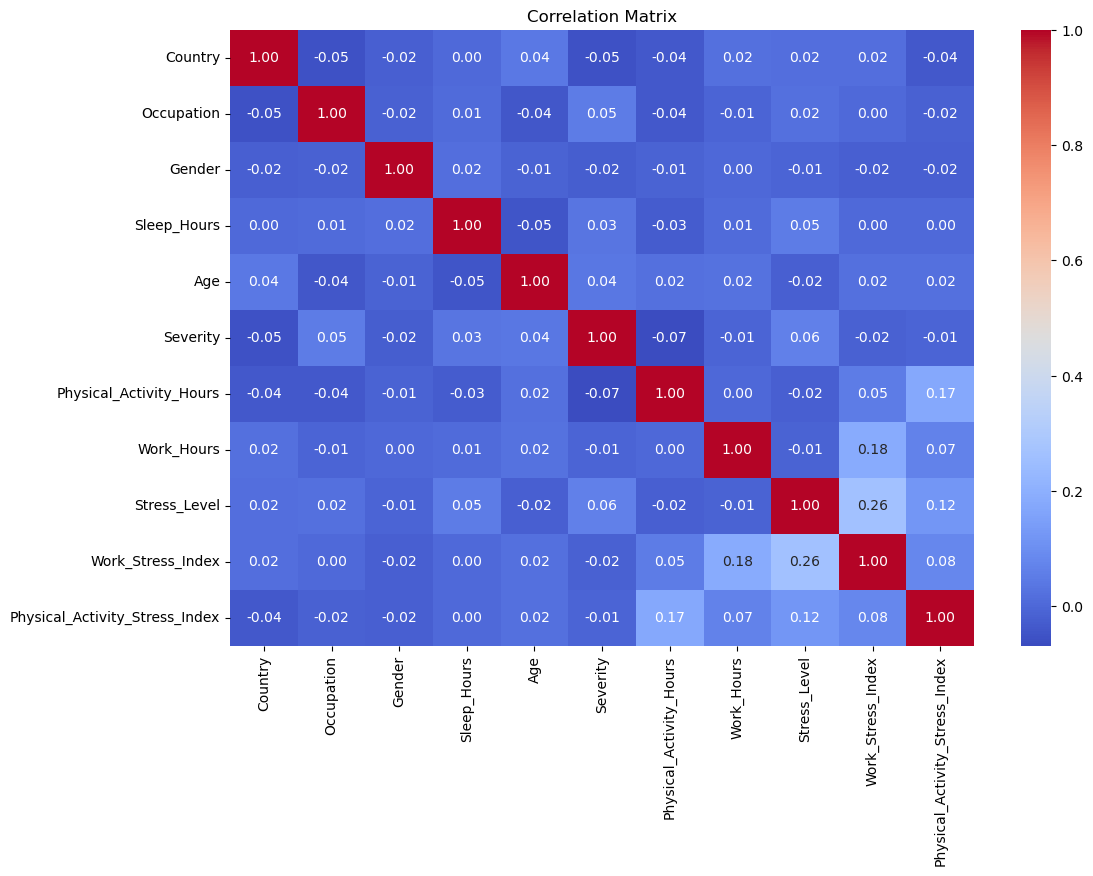

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
correlation_matrix = X_selected.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [12]:
threshold = 0.01  # Set a threshold for strong correlation
correlated_pairs = correlation_matrix.unstack().sort_values(ascending=False)
high_corr_pairs = correlated_pairs[(correlated_pairs > threshold) & (correlated_pairs < 1)]
print("Highly Correlated Pairs:")
print(high_corr_pairs)

Highly Correlated Pairs:
Stress_Level                    Work_Stress_Index                 0.262108
Work_Stress_Index               Stress_Level                      0.262108
Work_Hours                      Work_Stress_Index                 0.183091
Work_Stress_Index               Work_Hours                        0.183091
Physical_Activity_Stress_Index  Physical_Activity_Hours           0.173886
Physical_Activity_Hours         Physical_Activity_Stress_Index    0.173886
Physical_Activity_Stress_Index  Stress_Level                      0.119802
Stress_Level                    Physical_Activity_Stress_Index    0.119802
Work_Stress_Index               Physical_Activity_Stress_Index    0.077635
Physical_Activity_Stress_Index  Work_Stress_Index                 0.077635
Work_Hours                      Physical_Activity_Stress_Index    0.067863
Physical_Activity_Stress_Index  Work_Hours                        0.067863
Severity                        Stress_Level                      0.062386


In [13]:
from pgmpy.models import BayesianNetwork

structure = [
    ('Gender', 'Occupation'),
    ('Country', 'Age'),
    ('Physical_Activity_Hours', 'Country'),
    ('Physical_Activity_Hours', 'Mental_Health_Condition'),
    ('Gender', 'Mental_Health_Condition')
]

model = BayesianNetwork(structure)

print("Defined Bayesian Network structure:")
print(model.edges())

Defined Bayesian Network structure:
[('Gender', 'Occupation'), ('Gender', 'Mental_Health_Condition'), ('Country', 'Age'), ('Physical_Activity_Hours', 'Country'), ('Physical_Activity_Hours', 'Mental_Health_Condition')]


In [14]:
from pgmpy.estimators import MaximumLikelihoodEstimator

# Learn CPDs using Maximum Likelihood Estimation
model.fit(df, estimator=MaximumLikelihoodEstimator)

print("\nConditional Probability Distributions (CPDs):")
for cpd in model.get_cpds():
    print(cpd)


Conditional Probability Distributions (CPDs):
+-----------+----------+
| Gender(0) | 0.26551  |
+-----------+----------+
| Gender(1) | 0.229486 |
+-----------+----------+
| Gender(2) | 0.303536 |
+-----------+----------+
| Gender(3) | 0.201468 |
+-----------+----------+
+---------------+-----+---------------------+
| Gender        | ... | Gender(3)           |
+---------------+-----+---------------------+
| Occupation(0) | ... | 0.1291390728476821  |
+---------------+-----+---------------------+
| Occupation(1) | ... | 0.152317880794702   |
+---------------+-----+---------------------+
| Occupation(2) | ... | 0.15562913907284767 |
+---------------+-----+---------------------+
| Occupation(3) | ... | 0.1456953642384106  |
+---------------+-----+---------------------+
| Occupation(4) | ... | 0.11258278145695365 |
+---------------+-----+---------------------+
| Occupation(5) | ... | 0.1357615894039735  |
+---------------+-----+---------------------+
| Occupation(6) | ... | 0.168874172185

In [15]:
from pgmpy.inference import VariableElimination

# Perform inference
inference = VariableElimination(model)

# Query for the probability of Mental_Health_Condition given
evidence = {'Gender': 1}

query_result = inference.query(variables=['Mental_Health_Condition'], evidence=evidence)

print("\nInference result:")
print(query_result)


Inference result:
+----------------------------+--------------------------------+
| Mental_Health_Condition    |   phi(Mental_Health_Condition) |
+============================+================================+
| Mental_Health_Condition(0) |                         0.5579 |
+----------------------------+--------------------------------+
| Mental_Health_Condition(1) |                         0.4421 |
+----------------------------+--------------------------------+


In [16]:
import time

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Mental_Health_Condition'])
y = df['Mental_Health_Condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

In [18]:
# Fit the model using Maximum Likelihood Estimation
start_time = time.time()
model.fit(train_data, estimator=MaximumLikelihoodEstimator)
end_time = time.time()
print(f"Learning time: {end_time - start_time:.2f} seconds")

print("\nLearned CPDs:")
for cpd in model.get_cpds():
    print(cpd)

Learning time: 0.01 seconds

Learned CPDs:
+-----------+----------+
| Gender(0) | 0.259177 |
+-----------+----------+
| Gender(1) | 0.252503 |
+-----------+----------+
| Gender(2) | 0.296997 |
+-----------+----------+
| Gender(3) | 0.191324 |
+-----------+----------+
+---------------+-----+---------------------+
| Gender        | ... | Gender(3)           |
+---------------+-----+---------------------+
| Occupation(0) | ... | 0.1511627906976744  |
+---------------+-----+---------------------+
| Occupation(1) | ... | 0.1511627906976744  |
+---------------+-----+---------------------+
| Occupation(2) | ... | 0.1686046511627907  |
+---------------+-----+---------------------+
| Occupation(3) | ... | 0.12209302325581395 |
+---------------+-----+---------------------+
| Occupation(4) | ... | 0.11046511627906977 |
+---------------+-----+---------------------+
| Occupation(5) | ... | 0.14534883720930233 |
+---------------+-----+---------------------+
| Occupation(6) | ... | 0.1511627906976744

In [19]:
from pgmpy.inference import VariableElimination

inference = VariableElimination(model)

evidence = {

}
query_result = inference.query(variables=['Mental_Health_Condition'], evidence=evidence)
print("\nInference result for test evidence:")
print(query_result)


Inference result for test evidence:
+----------------------------+--------------------------------+
| Mental_Health_Condition    |   phi(Mental_Health_Condition) |
+============================+================================+
| Mental_Health_Condition(0) |                         0.5367 |
+----------------------------+--------------------------------+
| Mental_Health_Condition(1) |                         0.4633 |
+----------------------------+--------------------------------+


In [20]:
# Function to predict probabilities for each test case
def predict_probabilities(test_data, inference_engine, target):
    probabilities = []
    for _, row in test_data.iterrows():
        # Prepare evidence by removing the target variable
        evidence = {col: row[col] for col in test_data.columns if col != target}
        
        # Perform inference
        try:
            prob = inference_engine.query(variables=[target], evidence=evidence)
            probabilities.append(prob.values[1])  # Probability of target = 1
        except Exception as e:
            print(f"Error with evidence {evidence}: {e}")
            probabilities.append(0.5)  # Assign a neutral probability in case of error
    return probabilities

# Ensure test_data contains only the columns relevant to the Bayesian Network
network_nodes = list(model.nodes())  # Nodes in the Bayesian Network
filtered_test_data = test_data[network_nodes]

# Predict probabilities
test_probabilities = predict_probabilities(filtered_test_data, inference, 'Mental_Health_Condition')

# Convert probabilities to binary predictions based on a threshold
threshold = 0.5
test_predictions = [1 if prob >= threshold else 0 for prob in test_probabilities]

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
logloss = log_loss(y_test, test_probabilities)

print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Log-Loss: {logloss:.2f}")


Evaluation Metrics:
Accuracy: 0.56
Precision: 0.56
Recall: 0.22
F1-Score: 0.32
Log-Loss: 0.69


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix, classification_report

# Function to predict probabilities for each test case
def predict_probabilities(test_data, inference_engine, target):
    probabilities = []
    for _, row in test_data.iterrows():
        # Prepare evidence by removing the target variable
        evidence = {col: row[col] for col in test_data.columns if col != target}
        
        # Perform inference
        try:
            prob = inference_engine.query(variables=[target], evidence=evidence)
            probabilities.append(prob.values[1])  # Probability of target = 1
        except Exception as e:
            print(f"Error with evidence {evidence}: {e}")
            probabilities.append(0.5)  # Assign a neutral probability in case of error
    return probabilities

# Ensure test_data contains only the columns relevant to the Bayesian Network
network_nodes = list(model.nodes())  # Nodes in the Bayesian Network
filtered_test_data = test_data[network_nodes]

# Predict probabilities
start_time = time.time()  # Start timing
test_probabilities = predict_probabilities(filtered_test_data, inference, 'Mental_Health_Condition')
end_time = time.time()  # End timing
testing_time = end_time - start_time
print(f"Testing Time (Inference): {testing_time:.4f} seconds")

# Convert probabilities to binary predictions based on a threshold
threshold = 0.5
test_predictions = [1 if prob >= threshold else 0 for prob in test_probabilities]

# Calculate metrics
accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
logloss = log_loss(y_test, test_probabilities)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, test_predictions, target_names=["Class 0", "Class 1"])
print("\nClassification Report:")
print(class_report)

# Print Evaluation Metrics
print(f"Accuracy: {accuracy:.6f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Log-Loss: {logloss:.2f}")

Testing Time (Inference): 0.0757 seconds

Confusion Matrix:
[[275  48]
 [215  62]]

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.56      0.85      0.68       323
     Class 1       0.56      0.22      0.32       277

    accuracy                           0.56       600
   macro avg       0.56      0.54      0.50       600
weighted avg       0.56      0.56      0.51       600

Accuracy: 0.561667
Precision: 0.56
Recall: 0.22
F1-Score: 0.32
Log-Loss: 0.69
